'exercice est composé de plusieurs questions, faites-les dans l'ordre et faites
attention à respecter le nom des variables. N'hésitez pas à contacter l'équipe
DataScientest si vous rencontrez des problèmes.
L'objet de cet exercice est de réduire signi􀀁cativement la dimension d'un jeu de
données utilisé pour un problème de classi􀀁cation. Les packages utilisés seront
numpy, pandas, matplotlib, scikit-learn et ses sous-packages. Une brève
description du jeu de données est présentée ci-après.
Jeu de données
Le jeu de données est issu d'une étude menée sur un groupe de 400 patients
agés de 2 à 90 ans atteint ou non d'une maladie des reins. Pour chaque
observation, une personne est décrite selon 24 variables :
• id : Un identi􀀁ant unique est affecté à chaque patient
• age : L'âge du patient
• rbc : Quantité de globules rouges red blood cell count
(normal/abnormal)
• wc : Quantité de globules blancs White blood cell
count(normal/abnormal)
• pcc : Présence ou non de Chlorochromate de pyridinium
• ...
• ill : Indique si le patient est atteint de la maladie (par la modalité 1) ou non
(par la modalité 0).
En ce sens, cette dernière constitue la variable cible de données.
Pour plus de détails sur le jeux de données vous pouvez consulter cette
documentation. (https://assets-datascientest.s3-eu-west-1.amazonaws.com
/notebooks/kidney_disease_description.pdf)
L'objectif est de représenter ces patients en réduisant la dimension de départ.
Exécuter la cellule suivante pour importer les packages nécessaires à l'exercice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Traitement des données
• (a) Lire le 􀀁cher "kidney_disease.csv" dans un DataFrame nommé data en renseignant
comme index la colonne "id".
• (b) Af􀀁cher les 5 premières lignes de data.
• (c) Af􀀁cher le nombre de valeurs manquantes pour chacune des colonnes de data.

In [2]:
data = pd.read_csv("kidney_disease.csv", index_col="id")

# (b) Affichage des 5 premières lignes du DataFrame
display(data.head())
# (c) Affichage du nombre de valeurs manquantes par colonne
print(data.isnull().sum())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [3]:
data['classification'] = data['classification'].replace({'ckd':1, 'ckd\t':1, 'notckd':0})
data = data.rename({'classification': 'ill'}, axis=1)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,ill
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [4]:
data.replace('\t?', float('nan'), inplace=True)


In [5]:
data[['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv']] = data[['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv']].astype('float')


In [6]:
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')

In [7]:
data[['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']] = data[['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']].astype(str)

• (d) Af􀀁cher une description ainsi que les informations des colonnes de data.

In [8]:
# (d) Affichage de la description des colonnes
print(data.describe())
# Affichage
data.info()


              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.884498   
std     50.503006    5.7411

Il est facile de remarquer que certaines colonnes contiennent des valeurs
manquantes.
Il va donc falloir les traiter selon que les variables soient de type numériques ou
catégorielles.
• (e) Af􀀁cher le nombre de valeurs uniques pour chaque variable du DataFrame.

In [9]:
data.nunique()

age       76
bp        10
sg         5
al         6
su         6
rbc        3
pc         3
pcc        3
ba         3
bgr      146
bu       118
sc        84
sod       34
pot       40
hemo     115
pcv       42
wc        89
rc        48
htn        3
dm         6
cad        4
appet      3
pe         3
ane        3
ill        2
dtype: int64

In [10]:
data.drop('rc', axis=1, inplace=True)

(f) Identi􀀁er les noms des variables catégorielles et numériques dans deux listes distinctes
:
▪ cat_data (pour les noms des variables catégorielles)
▪ num_df (pour les noms des variables numériques).

In [11]:
# Identifiant les noms des variables catégorielles
cat_data = list(data.select_dtypes(include=["object"]).columns)

# Identifiant les noms des variables numériques
num_data = list(data.select_dtypes(include=["float64", "int64"]).columns)

# Affichage des noms des variables catégorielles
print("Variables catégorielles :", cat_data)

# Affichage des noms des variables numériques
print("Variables numériques :", num_data)

Variables catégorielles : ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Variables numériques : ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'ill']


(g) Pour toutes les variables numériques, remplacer les valeurs manquantes par la moyenne
de chaque variable.

In [12]:
for col in num_data:
    data[col] = data[col].fillna(data[col].mean())
# Affichage du DataFrame mis à jour
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,ill
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,nan,normal,notpresent,notpresent,121.000000,...,15.4,44.0,7800.0,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,nan,normal,notpresent,notpresent,148.036517,...,11.3,38.0,6000.0,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,9.6,31.0,7500.0,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,11.2,32.0,6700.0,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,11.6,35.0,7300.0,no,no,no,good,no,no,1


In [13]:
# Boucle pour remplacer les valeurs manquantes par la moyenne pour les variables numériques
for col in num_data:
    data[col] = data[col].fillna(data[col].mean())


• (h) Af􀀁cher toutes les modalités de toutes les variables catégorielles de data.

In [14]:
# Affichage des modalités de toutes les variables catégorielles
for col in cat_data:
    modalities = data[col].unique()
    print(f"Modalités de la variable '{col}':")
    print(modalities)
    print()

Modalités de la variable 'rbc':
['nan' 'normal' 'abnormal']

Modalités de la variable 'pc':
['normal' 'abnormal' 'nan']

Modalités de la variable 'pcc':
['notpresent' 'present' 'nan']

Modalités de la variable 'ba':
['notpresent' 'present' 'nan']

Modalités de la variable 'htn':
['yes' 'no' 'nan']

Modalités de la variable 'dm':
['yes' 'no' ' yes' '\tno' '\tyes' 'nan']

Modalités de la variable 'cad':
['no' 'yes' '\tno' 'nan']

Modalités de la variable 'appet':
['good' 'poor' 'nan']

Modalités de la variable 'pe':
['no' 'yes' 'nan']

Modalités de la variable 'ane':
['no' 'yes' 'nan']



(i) Remplacer les modalités différentes de nan par les valeurs -1 et 1. Par exemple 1 pour la
modalité 'yes' et -1 pour la modalité 'no'.
• (j) Af􀀁cher les 5 premières lignes de data.

In [15]:
# Liste des variables catégorielles
cat_vars = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Remplacement des modalités différentes de "nan"
data[cat_vars] = data[cat_vars].replace([' yes', '\tno', '\tyes','yes', 'no', 'normal', 'abnormal', 'notpresent', 'present', 'good', 'poor', 'nan'], [1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, np.nan])


In [16]:
# Remplacement des valeurs manquantes des variables catégorielles par leur mode
data[cat_data] = data[cat_data].fillna(data[cat_data].mode().iloc[0])

# Affichage du DataFrame mis à jour
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,ill
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,1.0,1.0,121.000000,...,15.4,44.0,7800.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,1.0,1.0,148.036517,...,11.3,38.0,6000.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,1.0,1.0,423.000000,...,9.6,31.0,7500.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,-1.0,-1.0,1.0,117.000000,...,11.2,32.0,6700.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,1.0,1.0,106.000000,...,11.6,35.0,7300.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1


In [17]:
for col in cat_data:
    modalities = data[col].unique()
    print(f"Modalités de la variable '{col}':")
    print(modalities)
    print()

Modalités de la variable 'rbc':
[ 1. -1.]

Modalités de la variable 'pc':
[ 1. -1.]

Modalités de la variable 'pcc':
[ 1. -1.]

Modalités de la variable 'ba':
[ 1. -1.]

Modalités de la variable 'htn':
[ 1. -1.]

Modalités de la variable 'dm':
[ 1. -1.]

Modalités de la variable 'cad':
[-1.  1.]

Modalités de la variable 'appet':
[ 1. -1.]

Modalités de la variable 'pe':
[-1.  1.]

Modalités de la variable 'ane':
[-1.  1.]



Pour 􀀁nir le nettoyage des données, il faut gérer les valeurs manquantes pour les
variables catégorielles qu'il va falloir remplacer ici par la valeur la plus fréquente
de chaques modalités.
(k) Remplacer les valeurs manquantes des variables catégorielles par leur mode.

In [18]:
# Remplacement des valeurs manquantes des variables catégorielles par leur mode
data[cat_data] = data[cat_data].fillna(data[cat_data].mode().iloc[0])

# Affichage du DataFrame mis à jour
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,ill
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,1.0,1.0,121.000000,...,15.4,44.0,7800.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,1.0,1.0,148.036517,...,11.3,38.0,6000.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,1.0,1.0,423.000000,...,9.6,31.0,7500.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,-1.0,-1.0,1.0,117.000000,...,11.2,32.0,6700.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,1.0,1.0,106.000000,...,11.6,35.0,7300.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1


(l) Véri􀀁er la présence de valeurs manquantes dans data.

In [19]:
# Vérification de la présence de valeurs manquantes dans data
missing_values = data.isnull().any()

# Affichage des colonnes contenant des valeurs manquantes
print("Colonnes contenant des valeurs manquantes :")
print(missing_values)


Colonnes contenant des valeurs manquantes :
age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wc       False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
ill      False
dtype: bool


In [20]:
data.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
ill      0
dtype: int64

Analyse des données
• (a) Stocker la variable cible "ill" dans une Series nommée y et af􀀁cher sa répartition.
• (b) Supprimer la variable 'ill' de data.

In [21]:
# Stockage de la variable cible "ill" dans une Series nommée "y"
y = data['ill']

# Affichage de la répartition de la variable cible
print(y.value_counts())


1    250
0    150
Name: ill, dtype: int64


In [22]:
# Suppression de la variable 'ill' de data
data.drop('ill', axis=1, inplace=True)

# Affichage des 5 premières lignes du DataFrame mis à jour
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,pcv,wc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,1.0,1.0,121.000000,...,4.627244,15.4,44.0,7800.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,1.0,1.0,148.036517,...,4.627244,11.3,38.0,6000.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,1.0,1.0,423.000000,...,4.627244,9.6,31.0,7500.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,-1.0,-1.0,1.0,117.000000,...,2.500000,11.2,32.0,6700.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,1.0,1.0,106.000000,...,4.627244,11.6,35.0,7300.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


A􀀁n de mettre à l'échelle nos données, il est nécessaire de les normaliser.
• (c) Normaliser data à l'aide de la classe StandardScaler du sous-module
sklearn.preprocessing. Stocker le résultat dans un array nommé norm.

In [23]:
# Importer la classe StandardScaler
from sklearn.preprocessing import StandardScaler

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Normaliser les données
norm = scaler.fit_transform(data)


(d) Créer une instance de la classe PCA nommée model.
• (e) Stocker la représentation de data obtenue par Analyse en Composantes Principales
dans un array nommé coord_acp.

In [24]:
# Importer la classe PCA
from sklearn.decomposition import PCA

# Créer une instance de PCA
model = PCA()

# Appliquer PCA sur les données normalisées
coord_acp = model.fit_transform(norm)


(f) Af􀀁cher la part de variance expliquée pour chaque composante de l'Analyse en
Composantes Principales.
• (g) Tracer le graphe de la variance expliquée en fonction du nombre de facteurs

Part de variance expliquée pour chaque composante:
[0.28672517 0.07975318 0.07330573 0.05603215 0.05276801 0.04532082
 0.0440013  0.04351468 0.03851466 0.03417495 0.03344458 0.03037568
 0.02777791 0.02551865 0.02182948 0.01897936 0.01698451 0.01578856
 0.01465474 0.01286127 0.01204653 0.00966021 0.00596787]


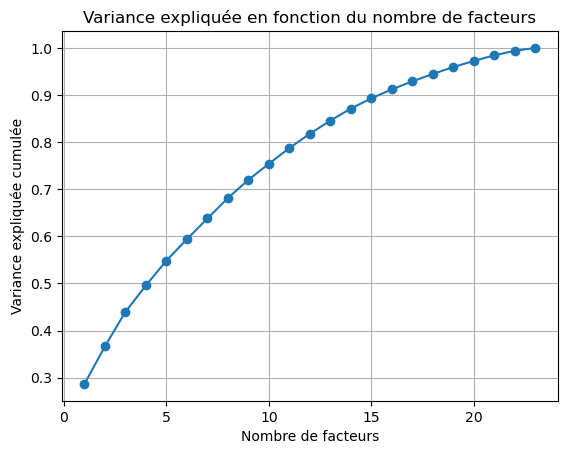

In [25]:
# Affichage de la part de variance expliquée pour chaque composante
explained_variance_ratio = model.explained_variance_ratio_
print("Part de variance expliquée pour chaque composante:")
print(explained_variance_ratio)

# Calcul de la variance expliquée cumulée
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Tracé du graphe de la variance expliquée en fonction du nombre de facteurs
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Nombre de facteurs')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée en fonction du nombre de facteurs')
plt.grid(True)
plt.show()


(h) Quelle nombre de composantes semble être optimale pour une compression des
données par ACP ?

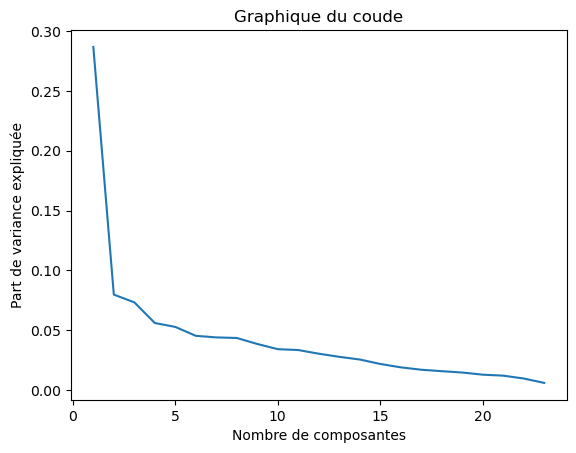

In [26]:
# Création du graphique du coude
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.title('Graphique du coude')
plt.show()

In [27]:
print("Si on se fixe une proportion de variance expliquée de 90 %, on peut se contenter de 15 composantes principales.")

Si on se fixe une proportion de variance expliquée de 90 %, on peut se contenter de 15 composantes principales.


• (i) Créer un nouveau DataFrame nommé acp_data contenant la représentation des
données sur les deux premières composantes de l'ACP ainsi que la variable cible.

In [28]:
acp_data = pd.DataFrame({'Component 1': coord_acp[:, 0], 'Component 2': coord_acp[:, 1], 'ill': y})


• (j) Af􀀁cher un nuage de points entre ces deux axes, colorés en fonction de la variable y.

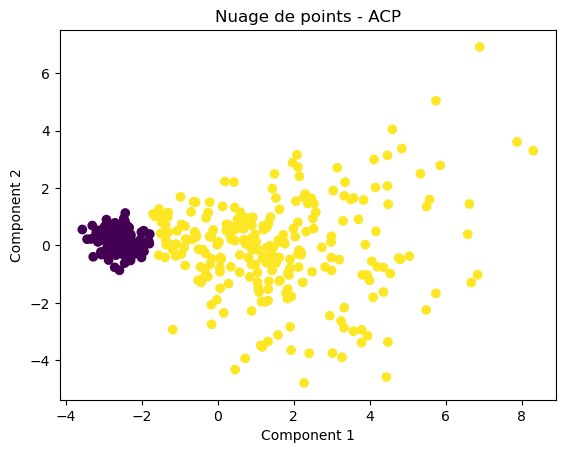

In [29]:
plt.scatter(acp_data['Component 1'], acp_data['Component 2'], c=acp_data['ill'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Nuage de points - ACP')
plt.show()


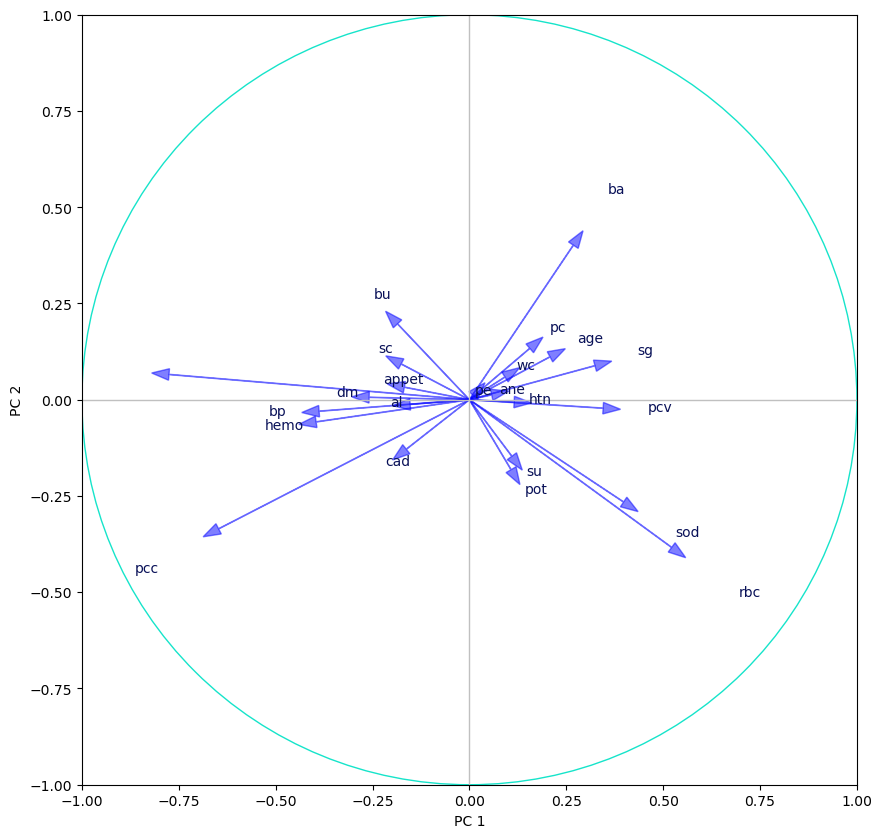

In [30]:
size = len(data.columns)
racine_valeurs_propres = np.sqrt(model.explained_variance_)
corvar = np.zeros((size,size))
for k in range(size):
    corvar[:,k] = model.components_[:,k] * racine_valeurs_propres[k]
#Délimitation de la figure
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#Affichage des variables
for j in range(size):
    plt.annotate(data.columns[j],(corvar[j,0]*0.8,corvar[j,1]*0.8),color='#091158')
    plt.arrow(0,0,corvar[j,0]*0.6,corvar[j,1]*0.6, alpha=0.5, head_width=0.03,color='b' )
#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#Cercle et légendes
cercle = plt.Circle((0,0),1,color='#16E4CA',fill=False)
axes.add_artist(cercle)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

(l) Quelle variable est la plus corrélée positivement au premier axe ?
• (m) Quelle variable est la plus corrélée négativement au premier axe ?
• (n) Quelle variable est la plus corrélée positivement au deuxième axe ?
• (o) Quelle variable est la plus corrélée négativement au deuxième axe ?
Quelle conclusion pouvez-vous en tirer ?

In [31]:
# Recherche de la variable la plus corrélée positivement au premier axe
index_variable_max_corr = np.argmax(corvar[:, 0])
variable_max_corr = data.columns[index_variable_max_corr]
print("La variable la plus corrélée positivement au premier axe est :", variable_max_corr)
index_variable_min_corr_1 = np.argmin(corvar[:, 0])
variable_min_corr_1 = data.columns[index_variable_min_corr_1]
print("La variable la plus corrélée négativement au premier axe est :", variable_min_corr_1)
index_variable_max_corr_2 = np.argmax(corvar[:, 1])
variable_max_corr_2 = data.columns[index_variable_max_corr_2]
print("La variable la plus corrélée positivement au deuxième axe est :", variable_max_corr_2)
index_variable_min_corr_2 = np.argmin(corvar[:, 1])
variable_min_corr_2 = data.columns[index_variable_min_corr_2]
print("La variable la plus corrélée négativement au deuxième axe est :", variable_min_corr_2)

La variable la plus corrélée positivement au premier axe est : rbc
La variable la plus corrélée négativement au premier axe est : bgr
La variable la plus corrélée positivement au deuxième axe est : ba
La variable la plus corrélée négativement au deuxième axe est : rbc


• (p) Dans notre cas, nous avons le diagnostic 􀀁nal du patient. Dans certains cas, cette variable
n'est pas disponible. Il faut alors déterminer quel point appartient à quel groupe. Pour cela,
nous utilisons l'algorithme des K-moyennes.
Dans l'ordre :
• Créer une instance de la classe KMeans avec le nombre de clusters qui vous semble juste.
• Ajuster le modèle au données coord_acp.
• Récupérer les predictions réalisées par l'algorithme.
• Stocker dans un nouveau DataFrame les coordonnées de chaque point sur les 2 premières
composantes principales ainsi que la prédiction associée.
• Af􀀁cher les résultats sur un graphe.

C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


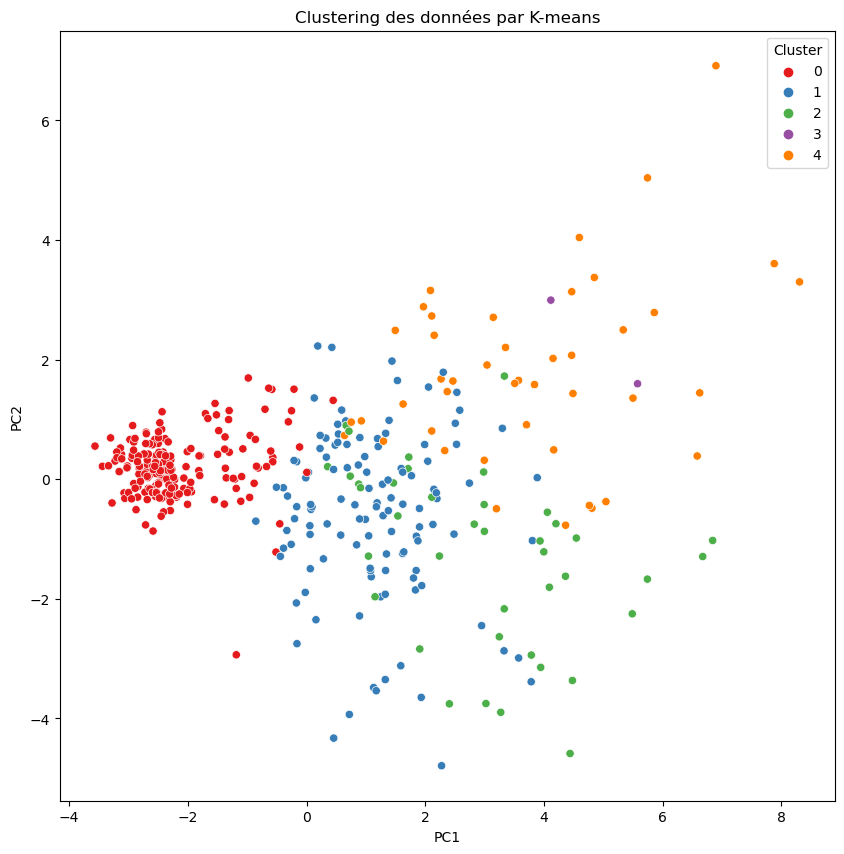

In [32]:
from sklearn.cluster import KMeans

# Création de l'instance du modèle K-means avec le nombre de clusters choisi
kmeans = KMeans(n_clusters=5)

# Ajustement du modèle aux données coord_acp
kmeans.fit(coord_acp)

# Récupération des prédictions réalisées par l'algorithme
predictions = kmeans.predict(coord_acp)

# Création d'un nouveau DataFrame avec les coordonnées et les prédictions associées
kmeans_data = pd.DataFrame({'PC1': coord_acp[:, 0], 'PC2': coord_acp[:, 1], 'Cluster': predictions})

# Affichage des résultats sur un graphe
plt.figure(figsize=(10, 10))
sns.scatterplot(data=kmeans_data, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering des données par K-means')
plt.show()


(q) Afficher le nombre de patients appartenant à chacun des groupes obtenus par le
K-Means.

In [33]:
# Insérer votre code ici
group_counts = kmeans_data['Cluster'].value_counts()
print(group_counts)

0    195
1    119
4     44
2     40
3      2
Name: Cluster, dtype: int64


• (r) À présent, nous allons nous intéresser à un autre type de représentation vu lors des
exercices faits précédemment: L'algorithme du T-SNE.
Dans l'ordre :
• Créer une instance de la classe TSNE.
• Appliquer la T-SNE aux données norm.
• Stocker dans un nouveau DataFrame nommé coord_TSNE les 2 premières coordonnées de
chaque point obtenues par TSNE ainsi que la variable cible.
• Af􀀁cher dans un nuage de points chaque individu coloré en fonction de la variable cible.

C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


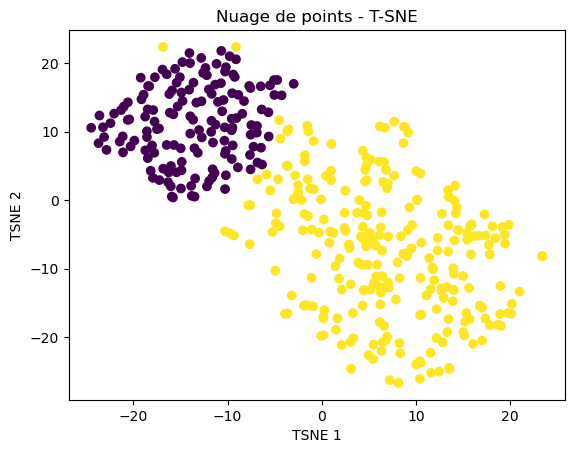

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Création de l'instance TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Application de t-SNE sur les données normalisées
tsne_coords = tsne.fit_transform(norm)

# Création du DataFrame coord_TSNE
coord_TSNE = pd.DataFrame(tsne_coords[:, :2], columns=['TSNE 1', 'TSNE 2'])
coord_TSNE['ill'] = y

# Affichage du nuage de points coloré par la variable cible
plt.scatter(coord_TSNE['TSNE 1'], coord_TSNE['TSNE 2'], c=coord_TSNE['ill'])
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Nuage de points - T-SNE')
plt.show()



• (s) Comme dans le cas précédent, nous allons appliquer l'algorithme des K-Means sur les
coordonnées calculées par le T-SNE.
Dans l'ordre :
• Créer une instance de la classe KMeans avec le nombre de clusters qui vous semble juste.
• Ajuster le modèle au données coord_TSNE.
• Récupérer les predictions réalisées par l'algorithme.
• Stocker dans un nouveau DataFrame les coordonnées de chaque point sur les 2 premières
composantes principales ainsi que la prédiction associée.
• Af􀀁cher les résultats sur un nuage de points.

C:\Users\brune\anaconda3\envs\CoursHN\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


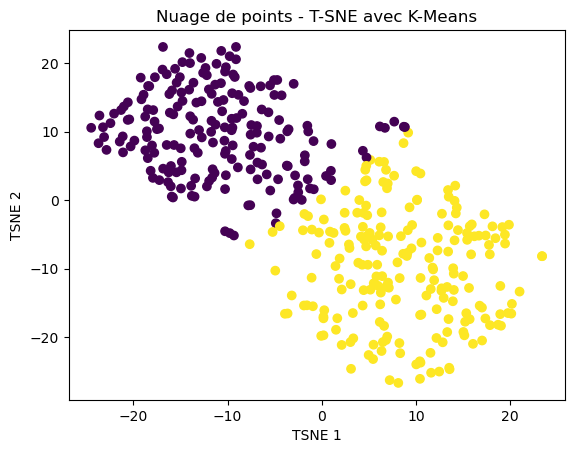

In [35]:
from sklearn.cluster import KMeans

# Création de l'instance KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

# Ajustement du modèle aux coordonnées TSNE
kmeans.fit(tsne_coords)

# Récupération des prédictions
kmeans_labels = kmeans.labels_

# Création du DataFrame avec les coordonnées TSNE et les prédictions
tsne_clusters = pd.DataFrame(tsne_coords[:, :2], columns=['TSNE 1', 'TSNE 2'])
tsne_clusters['Cluster'] = kmeans_labels

# Affichage du nuage de points coloré par les clusters
plt.scatter(tsne_clusters['TSNE 1'], tsne_clusters['TSNE 2'], c=tsne_clusters['Cluster'])
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Nuage de points - T-SNE avec K-Means')
plt.show()


• (t) Af􀀁cher le nombre de personnes malades et non malades obtenu par le K-Means.

In [36]:
# Nombre de personnes malades (cluster 1)
nb_personnes_malades = np.sum(kmeans_labels == 1)

# Nombre de personnes non malades (cluster 0)
nb_personnes_non_malades = np.sum(kmeans_labels == 0)

print("Nombre de personnes malades :", nb_personnes_malades)
print("Nombre de personnes non malades :", nb_personnes_non_malades)


Nombre de personnes malades : 206
Nombre de personnes non malades : 194


In [37]:
y.value_counts()

1    250
0    150
Name: ill, dtype: int64

Que pouvez vous conclure ?